<a href="https://colab.research.google.com/github/Chirag-Punia/Credit_Card_Fraud_Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Card Fraud Detection - Unsupervised Anomaly Detection

The dataset used for training the model has 284315 non-fraud data points and 492 fraud data points.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras import regularizers
from keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Dense,
    Flatten,
    Dropout,
    BatchNormalization,
)
from keras.optimizers import Adam

## Reading the dataset and running some stats

In [ ]:
df = pd.read_csv("creditcard_data.csv")

In [ ]:
df.shape

(14595, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.isnull().any()

,0
Time,False
V1,False
V2,False
V3,False
V4,False
V5,False
V6,False
V7,False
V8,False
V9,False


The data types look correct!

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,14595.000000,...,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000,14594.000000
mean,10789.397670,-0.235869,0.281890,0.836157,0.301529,-0.120216,0.127655,-0.156335,-0.013457,0.958179,...,-0.067785,-0.159067,-0.034452,0.012024,0.117077,0.035892,0.013886,0.003275,64.167390,0.004180
std,8185.099006,1.733224,1.400483,1.580158,1.496743,1.298186,1.323321,1.245896,1.261783,1.225899,...,0.868051,0.621986,0.495948,0.587172,0.429212,0.554197,0.398324,0.254092,177.256238,0.064518
min,0.000000,-27.670569,-34.607649,-24.667741,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,3120.000000,-0.970401,-0.287015,0.398237,-0.625120,-0.715802,-0.626724,-0.613229,-0.182259,0.236955,...,-0.272055,-0.552828,-0.172879,-0.339159,-0.137046,-0.369383,-0.075588,-0.014270,5.490000,0.000000
50%,9765.000000,-0.318075,0.251920,0.954945,0.224760,-0.189767,-0.150116,-0.107062,0.017199,0.941903,...,-0.131175,-0.123806,-0.044647,0.060358,0.156752,-0.033930,-0.000373,0.016598,15.900000,0.000000
75%,18792.500000,1.162615,0.884715,1.598016,1.190561,0.350648,0.506798,0.421533,0.265329,1.628664,...,0.020955,0.228997,0.071106,0.393153,0.393032,0.369598,0.098414,0.073539,52.915000,0.000000
max,25810.000000,1.960497,10.819665,4.101716,11.927512,34.099309,21.393069,34.303177,11.580797,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


## Exploratory Data Analysis

In [ ]:
df["Class"].value_counts()

,count
Class,
0.0,14533
1.0,61


The counts for each of the 2 target class shows a highly imbalanced data.

<ipython-input-18-1b0ea60407ad>:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_count = pd.value_counts(df["Class"], sort=True)


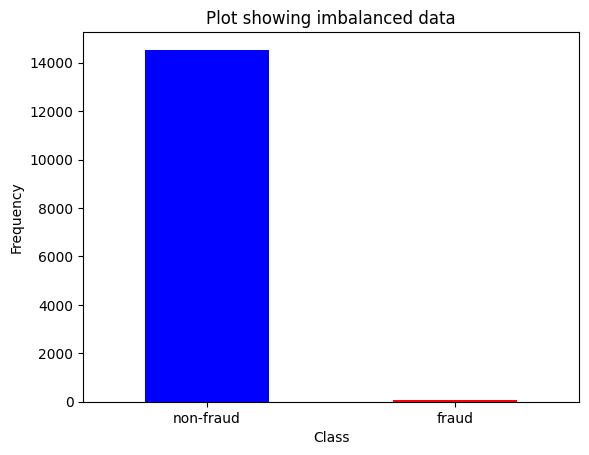

In [ ]:
class_name = ["non-fraud", "fraud"]
class_count = pd.value_counts(df["Class"], sort=True)
class_count.plot(kind="bar", rot=0, color=["blue", "red"])
plt.xticks(range(2), class_name)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Plot showing imbalanced data")
plt.show()

The bar graph shows highly imbalanced dataset. There are 284315 data points for non-fraud data as compared to only 492 data points for fraud data.

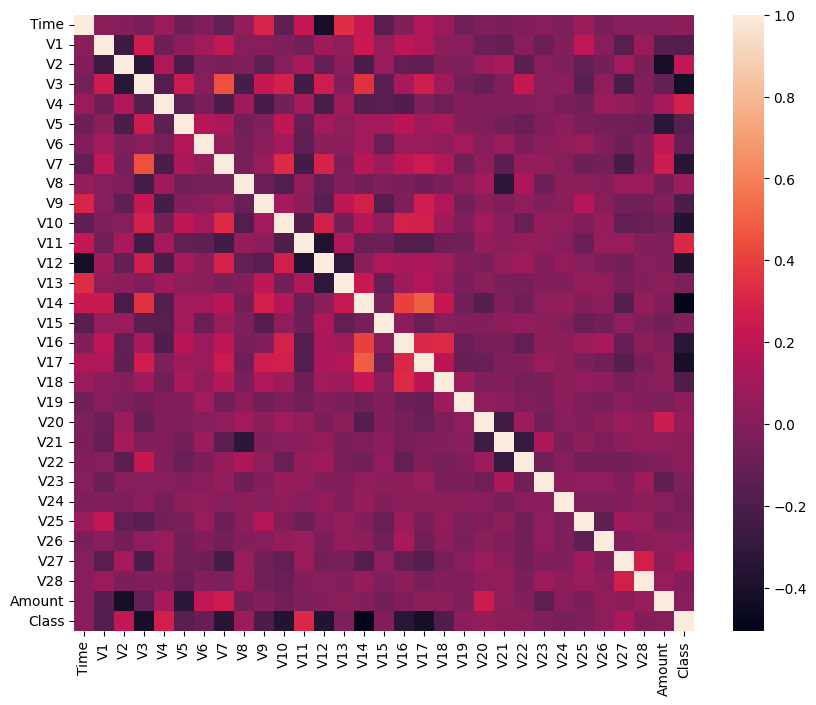

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.show()

The correlation plot shows no presence of multi collinearity amongst V1 to V28 features (PCA components). Some of these features does show high correlation with the target class (Class) and independent features - Time and Amount. The target class does not seem to have any correlation with Time and Amount.

In [ ]:
fraud_data = df[df["Class"] == 1].reset_index(drop=True)
non_fraud_data = df[df["Class"] == 0].reset_index(drop=True)

print("Fraud Data Shape: ", fraud_data.shape)
print("Non-Fraud Data Shape: ", non_fraud_data.shape)

Fraud Data Shape:  (61, 31)
Non-Fraud Data Shape:  (14533, 31)


In [ ]:
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0


In [ ]:
non_fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


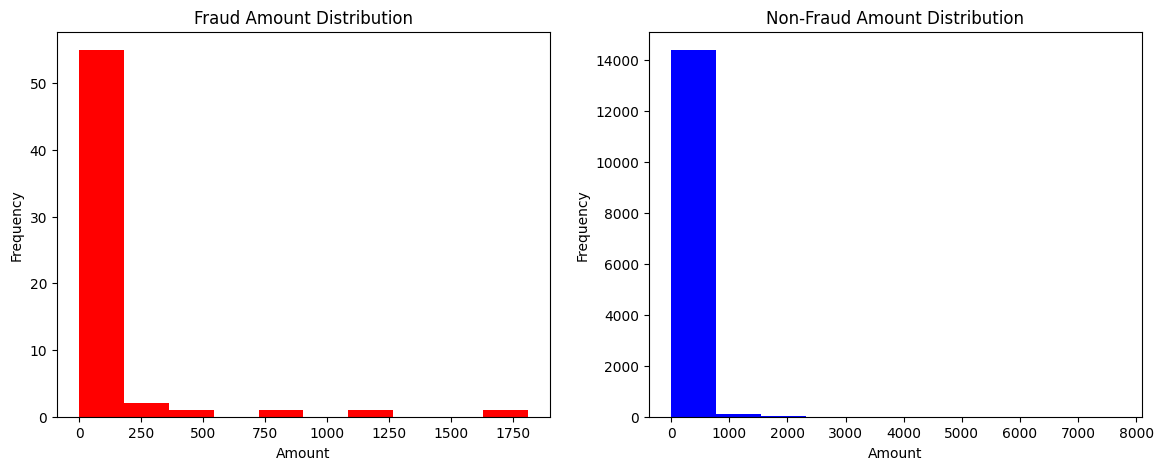

In [ ]:
fig = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(fraud_data["Amount"], color="red")
plt.title("Fraud Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(non_fraud_data["Amount"], color="blue")
plt.title("Non-Fraud Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.show()

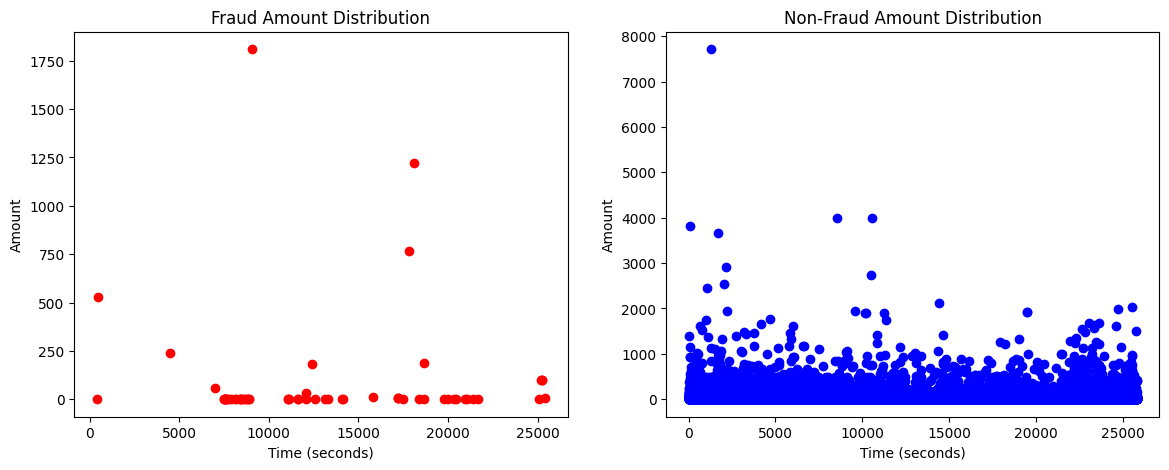

In [ ]:
fig = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(fraud_data["Time"], fraud_data["Amount"], color="red")
plt.title("Fraud Amount Distribution")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")

plt.subplot(1, 2, 2)
plt.scatter(non_fraud_data["Time"], non_fraud_data["Amount"], color="blue")
plt.title("Non-Fraud Amount Distribution")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")

plt.show()

Based on the above plot, time and amount doesn't seem to show any significant correlation.

## Unsupervised Machine Learning Techniques for Anomaly Detection

In [ ]:
sampled_data = df.sample(frac=0.1, random_state=42)

print("Sampled Data Shape:", sampled_data.shape)
print("Target Class Value Count: ")
print(sampled_data["Class"].value_counts())

Sampled Data Shape: (1460, 31)
Target Class Value Count: 
Class
0.0    1449
1.0      10
Name: count, dtype: int64


In [ ]:
X = sampled_data.drop("Class", axis=1)
y = sampled_data["Class"]

print("X Shape: ", X.shape)
print("y Shape: ", y.shape)
print("========================================")
print("Target Class Value Count: ")
print("Normal Class: ", (y == 0).sum())
print("Fraud Class: ", (y == 1).sum())

fraud = sampled_data[sampled_data["Class"] == 1]
non_fraud = sampled_data[sampled_data["Class"] == 0]

outlier_fraction = len(fraud) / float(len(non_fraud))
print("========================================")
print("Fraud Fraction: ", outlier_fraction)

X Shape:  (1460, 30)
y Shape:  (1460,)
Target Class Value Count: 
Normal Class:  1449
Fraud Class:  10
Fraud Fraction:  0.006901311249137336


## 1. Isolation Forest (Unsupervised Outlier Detection)
Since isolation trees are unsupervised algorithms, they can find anomalies or outliers without the requirement for labeling. It proceeds as follows: Data is partitioned recursively and randomly, and the results are shown as a tree (random forest).

In [ ]:
if np.any(np.isnan(X)):
    print("NaN values found in input data. Handling NaNs...")
    X = pd.DataFrame(X).fillna(X.mean()).values

if np.any(np.isnan(y)):
    print("NaN values found in target labels. Handling NaNs...")
    y = pd.Series(y).fillna(y.mode()[0]).values


outlier_fraction = 0.1


clf = IsolationForest(n_estimators=100, max_samples=len(X), random_state=42, contamination=outlier_fraction)

clf.fit(X)
y_pred = clf.predict(X)

print("Predicted Anomalous Data Points: ", len(y_pred[y_pred == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred[y_pred == 1]))
print("=======================================================")


y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1


print("Number of misclassified data points: ", (y_pred != y).sum())
print("\nAccuracy Score: ", accuracy_score(y, y_pred))

print("\nClassification Report: ")
print(classification_report(y, y_pred))


Predicted Anomalous Data Points:  146
Predicted Non Anomalous Data Points:  1314
Number of misclassified data points:  140

Accuracy Score:  0.9041095890410958

Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      1450
         1.0       0.05      0.80      0.10        10

    accuracy                           0.90      1460
   macro avg       0.53      0.85      0.53      1460
weighted avg       0.99      0.90      0.94      1460



In [ ]:

sampled_data["y_pred_iso"] = y_pred
print(sampled_data["y_pred_iso"].value_counts())

y_pred_iso
0    1314
1     146
Name: count, dtype: int64


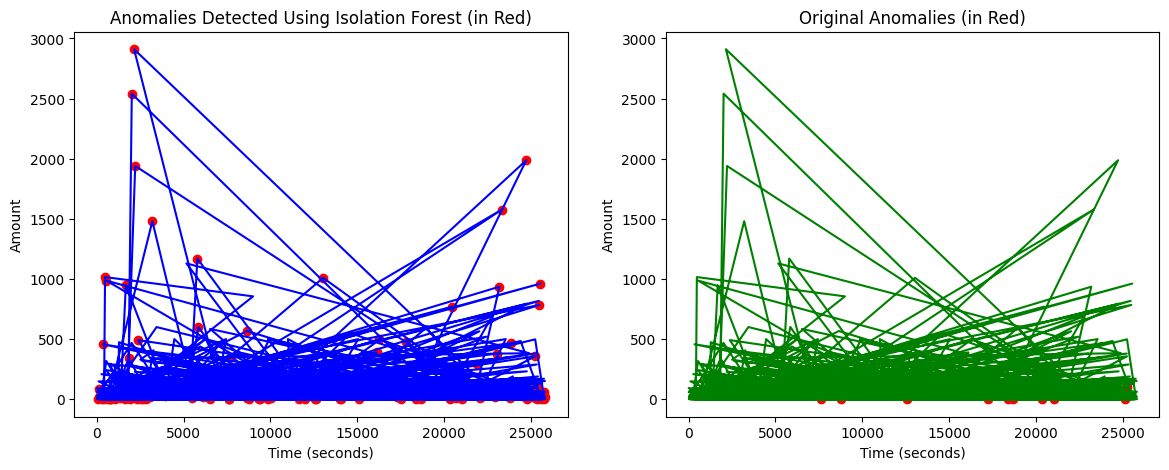

In [ ]:
fig = plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
anomaly_df = sampled_data.loc[sampled_data["y_pred_iso"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="blue")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Anomalies Detected Using Isolation Forest (in Red)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")


plt.subplot(1, 2, 2)
anomaly_df = sampled_data.loc[sampled_data["Class"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="green")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Original Anomalies (in Red)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")

plt.show()

##2.Local Outlier Factor (Unsupervised Outlier Detection)

n_neighbors: int; 20 is the default The default number of neighbors for kneighbors queries. Every sample will be used if the number of neighbors (n_neighbors) exceeds the number of samples supplied.

leaf_size: int, 30 by default Leaf size is sent to either KDTree or BallTree. This may have an impact on how quickly the tree is constructed and queried, as well as how much memory is used. The nature of the situation determines the ideal value.

The distance calculation uses the default'minkowski' metric, which can be either str or callable. Any metric from scipy.spatial or scikit-learn.One can employ distance.

p: int, default=2 A parameter from sklearn.metrics.pairwise.pairwise_distances for the Minkowski metric. This is similar to using euclidean_distance (l2) for p = 2, and manhattan_distance (l1) for p = 1. Minkowski_distance (l_p) is utilized for arbitrary p.


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=20,
    algorithm="auto",
    leaf_size=30,
    metric="minkowski",
    p=2,
    metric_params=None,
    contamination=outlier_fraction,
)

y_pred_lof = lof.fit_predict(X)

print("Predicted Anomalous Data Points: ", len(y_pred_lof[y_pred_lof == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred_lof[y_pred_lof == 1]))
print("================================================================")


# replacing -1 by 1 and 1 by 0
y_pred_lof[y_pred_lof == 1] = 0
y_pred_lof[y_pred_lof == -1] = 1

# evaluation
print("Number of misclassified data points: ", (y_pred_lof != y).sum())
print("\nAccuracy Score :", accuracy_score(y, y_pred_lof))

print("\nClassification Report: ")
print(classification_report(y, y_pred_lof))

Predicted Anomalous Data Points:  146
Predicted Non Anomalous Data Points:  1314
Number of misclassified data points:  156

Accuracy Score : 0.8931506849315068

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      1450
         1.0       0.00      0.00      0.00        10

    accuracy                           0.89      1460
   macro avg       0.50      0.45      0.47      1460
weighted avg       0.99      0.89      0.94      1460



In [ ]:
sampled_data["y_pred_lof"] = y_pred_lof
print(sampled_data["y_pred_lof"].value_counts())

y_pred_lof
0    1314
1     146
Name: count, dtype: int64


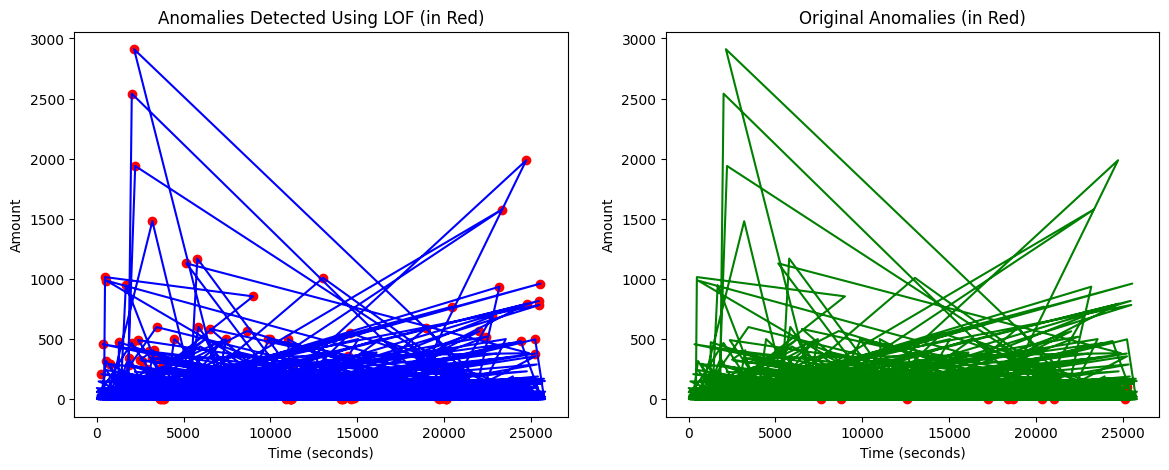

In [ ]:
fig = plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
anomaly_df = sampled_data.loc[sampled_data["y_pred_lof"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="blue")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Anomalies Detected Using LOF (in Red)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")


plt.subplot(1, 2, 2)
anomaly_df = sampled_data.loc[sampled_data["Class"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="green")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Original Anomalies (in Red)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")

plt.show()

## 3. Deep Learning - AutoEncoders

In [ ]:
normal_trans = df[df["Class"] == 0].sample(2000)
fraud_trans = df[df["Class"] == 1]
dl_sample_data = pd.concat([normal_trans, fraud_trans]).reset_index(drop=True)

print("Target Class Value Counts: ")
print(dl_sample_data["Class"].value_counts())


Target Class Value Counts: 
Class
0.0    2000
1.0      61
Name: count, dtype: int64


In [ ]:
X = dl_sample_data.drop("Class", axis=1)
y = dl_sample_data["Class"]

print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

X Shape:  (2061, 30)
y Shape:  (2061,)


### Visualize the data with t-SNE
Other than PCA and SVD, TNSE (t-distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique. By doing this, some noise will be suppressed and the pairwise distance between samples will be computed more quickly.


In [ ]:
def dimensionality_plot(X, y):

    tsne = TSNE(n_components=2, random_state=42)

    X_trans = tsne.fit_transform(X)

    plt.figure(figsize=(10, 6))

    plt.scatter(
        X_trans[np.where(y == 0), 0],
        X_trans[np.where(y == 0), 1],
        marker="o",
        color="b",
        linewidth=1,
        alpha=0.8,
        label="Normal",
    )

    plt.scatter(
        X_trans[np.where(y == 1), 0],
        X_trans[np.where(y == 1), 1],
        marker="o",
        color="r",
        linewidth=1,
        alpha=0.8,
        label="Fraud",
    )

    plt.legend(loc="best")

    plt.show()

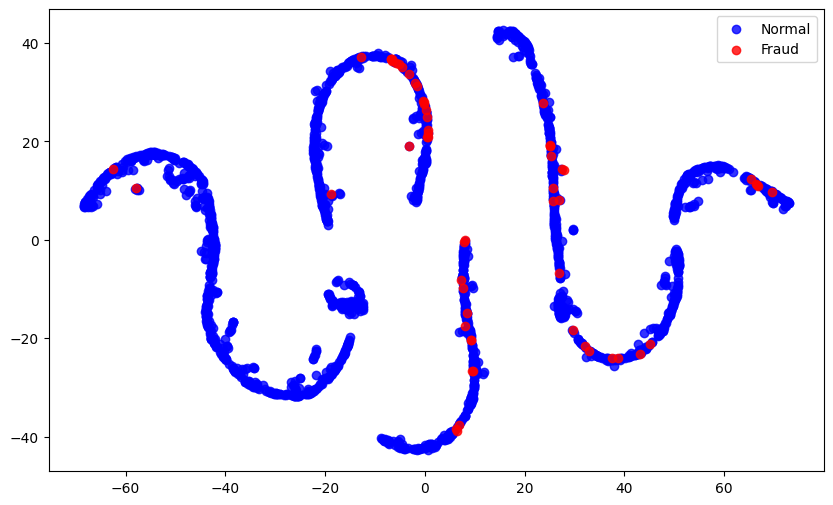

In [ ]:
dimensionality_plot(X, y)

In [ ]:
scaler = StandardScaler().fit_transform(X)

X_scaled_normal = scaler[y == 0]
X_scaled_fraud = scaler[y == 1]

In [ ]:
input_layer = Input(shape=(X.shape[1],))


encoded = Dense(100, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    input_layer
)
encoded = Dense(50, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    encoded
)
encoded = Dense(25, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    encoded
)
encoded = Dense(12, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    encoded
)
encoded = Dense(6, activation="relu")(encoded)

decoded = Dense(12, activation="tanh")(encoded)
decoded = Dense(25, activation="tanh")(decoded)
decoded = Dense(50, activation="tanh")(decoded)
decoded = Dense(100, activation="tanh")(decoded)

output_layer = Dense(X.shape[1], activation="sigmoid")(decoded)

# creating the model
autoencoder = Model(input_layer, output_layer)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 12)                312       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 12)                84    

In [ ]:
autoencoder.compile(optimizer="adam", loss="mse")

history = autoencoder.fit(
    X_scaled_normal,
    X_scaled_normal,
    batch_size=32,
    epochs=50,
    shuffle=True,
    validation_split=0.20,
)

Epoch 1/50
50/50 [==============================] - 3s 15ms/step - loss: 0.7832 - val_loss: 0.6934
Epoch 2/50
50/50 [==============================] - 0s 7ms/step - loss: 0.6634 - val_loss: 0.6608
Epoch 3/50
50/50 [==============================] - 0s 6ms/step - loss: 0.6319 - val_loss: 0.6389
Epoch 4/50
50/50 [==============================] - 1s 18ms/step - loss: 0.6132 - val_loss: 0.6274
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 0.6026 - val_loss: 0.6179
Epoch 6/50
50/50 [==============================] - 0s 6ms/step - loss: 0.5944 - val_loss: 0.6122
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5881 - val_loss: 0.6055
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5836 - val_loss: 0.6012
Epoch 9/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5790 - val_loss: 0.5982
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5751 - val_loss: 0.5924
Epoch 11/50
50/50

Text(0.5, 1.0, 'Loss Curves')

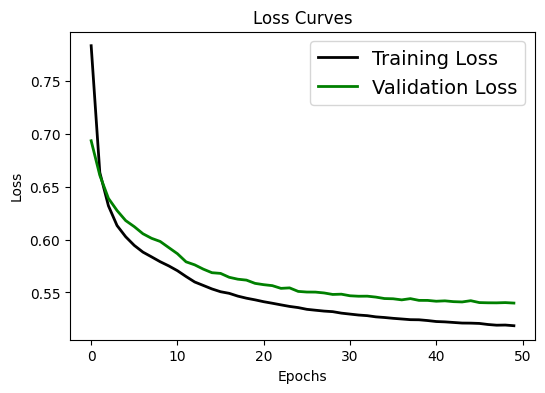

In [ ]:
# Loss curve

plt.figure(figsize=[6, 4])
plt.plot(history.history["loss"], "black", linewidth=2.0)
plt.plot(history.history["val_loss"], "green", linewidth=2.0)
plt.legend(["Training Loss", "Validation Loss"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.title("Loss Curves", fontsize=12)

In [ ]:
latent_model = Sequential()
latent_model.add(autoencoder.layers[0])
latent_model.add(autoencoder.layers[1])
latent_model.add(autoencoder.layers[2])
latent_model.add(autoencoder.layers[3])
latent_model.add(autoencoder.layers[4])

In [ ]:
normal_datapoints = latent_model.predict(X_scaled_normal)
fraud_datapoints = latent_model.predict(X_scaled_fraud)


encoded_X = np.append(normal_datapoints, fraud_datapoints, axis=0)

y_normal = np.zeros(normal_datapoints.shape[0])
y_fraud = np.ones(fraud_datapoints.shape[0])
encoded_y = np.append(y_normal, y_fraud, axis=0)

2/2 [==============================] - 0s 6ms/step


In [ ]:
# splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# splitting the encoded data
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(
    encoded_X, encoded_y, test_size=0.25
)

print(
    f"Encoded train data X: {X_enc_train.shape}, Y: {y_enc_train.shape}, X_test :{X_enc_test.shape}, Y_test: {y_enc_test.shape}"
)
print(
    f"Actual train & test data X: {X_train.shape}, Y: {X_train.shape}, X_test :{X_test.shape}, Y_test: {y_test.shape}"
)

Encoded train data X: (1545, 12), Y: (1545,), X_test :(516, 12), Y_test: (516,)
Actual train & test data X: (1545, 30), Y: (1545, 30), X_test :(516, 30), Y_test: (516,)


In [ ]:
# applying support vector classifier on the encoded data

svc_clf = SVC(probability=True)

svc_clf.fit(X_enc_train, y_enc_train)

svc_predictions = svc_clf.predict(X_enc_test)

# y_probability
y_proba = svc_clf.predict_proba(X_enc_test)[:, 1]

average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy of SVC {:.2f}".format(accuracy_score(y_enc_test, svc_predictions)))
print("==============================================================")

print(f"ROC-AUC Score: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("==============================================================")

print(f"Average Precision-Recall Score: {average_precision:.2f}")
print("==============================================================")

print(
    "\nClassification report \n {0}".format(
        classification_report(y_enc_test, svc_predictions)
    )
)

Accuracy of SVC 1.00
ROC-AUC Score: 1.00
Average Precision-Recall Score: 1.00

Classification report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       501
         1.0       1.00      0.93      0.97        15

    accuracy                           1.00       516
   macro avg       1.00      0.97      0.98       516
weighted avg       1.00      1.00      1.00       516



In [ ]:
# applying logistic regression model on the encoded data

lr_clf = LogisticRegression()

lr_clf.fit(X_enc_train, y_enc_train)

predictions = lr_clf.predict(X_enc_test)

y_proba = lr_clf.predict_proba(X_enc_test)[:, 1]

average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy score is : {:.2f}".format(accuracy_score(y_enc_test, predictions)))
print("==============================================================")

print(f"ROC-AUC Score: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("==============================================================")

print(f"Average Precision-Recall Score: {average_precision:.2f}")
print("==============================================================")

print(
    "\nClassification report \n {0}".format(
        classification_report(y_enc_test, predictions)
    )
)

Accuracy score is : 1.00
ROC-AUC Score: 1.00
Average Precision-Recall Score: 0.99

Classification report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       501
         1.0       1.00      0.93      0.97        15

    accuracy                           1.00       516
   macro avg       1.00      0.97      0.98       516
weighted avg       1.00      1.00      1.00       516



## 4. CNN - Convolution Neural Network

In [ ]:
print(X.shape)
print(y.shape)

(2061, 30)
(2061,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("y_train Shape", y_train.shape)
print("y_test Shape", y_test.shape)

# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train Shape (1545, 30)
X_test Shape (516, 30)
y_train Shape (1545,)
y_test Shape (516,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((1545, 30, 1), (516, 30, 1))

In [ ]:
model = Sequential()

model.add(
    Conv1D(filters=32, kernel_size=2, activation="relu", input_shape=X_train[0].shape)
)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(filters=64, kernel_size=2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)           

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC()],
)

# fitting the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
49/49 [==============================] - 4s 27ms/step - loss: 0.2133 - accuracy: 0.9456 - auc: 0.9480 - val_loss: 0.0605 - val_accuracy: 0.9787 - val_auc: 0.9933
Epoch 2/50
49/49 [==============================] - 1s 19ms/step - loss: 0.0750 - accuracy: 0.9935 - auc: 0.9604 - val_loss: 0.0794 - val_accuracy: 0.9767 - val_auc: 0.9991
Epoch 3/50
49/49 [==============================] - 1s 19ms/step - loss: 0.0384 - accuracy: 0.9961 - auc: 0.9867 - val_loss: 0.0853 - val_accuracy: 0.9767 - val_auc: 0.9167
Epoch 4/50
49/49 [==============================] - 1s 17ms/step - loss: 0.0325 - accuracy: 0.9942 - auc: 0.9717 - val_loss: 0.0464 - val_accuracy: 0.9845 - val_auc: 1.0000
Epoch 5/50
49/49 [==============================] - 1s 20ms/step - loss: 0.0189 - accuracy: 0.9961 - auc: 0.9862 - val_loss: 0.0511 - val_accuracy: 0.9864 - val_auc: 0.9722
Epoch 6/50
49/49 [==============================] - 1s 22ms/step - loss: 0.0247 - accuracy: 0.9935 - auc: 0.9860 - val_loss: 0.0413 - v

Text(0.5, 1.0, 'Loss Curves')

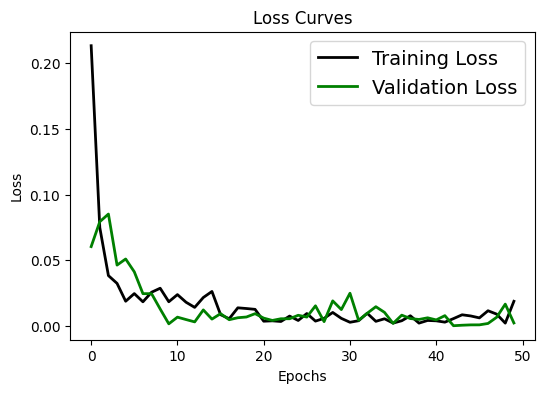

In [ ]:
# Loss curve

plt.figure(figsize=[6, 4])
plt.plot(history.history["loss"], "black", linewidth=2.0)
plt.plot(history.history["val_loss"], "green", linewidth=2.0)
plt.legend(["Training Loss", "Validation Loss"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.title("Loss Curves", fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

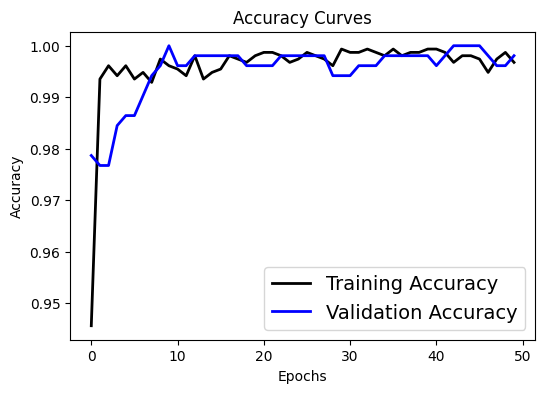

In [ ]:
# Accuracy curve

plt.figure(figsize=[6, 4])
plt.plot(history.history["accuracy"], "black", linewidth=2.0)
plt.plot(history.history["val_accuracy"], "blue", linewidth=2.0)
plt.legend(["Training Accuracy", "Validation Accuracy"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.title("Accuracy Curves", fontsize=12)

Text(0.5, 1.0, 'AUC Curves')

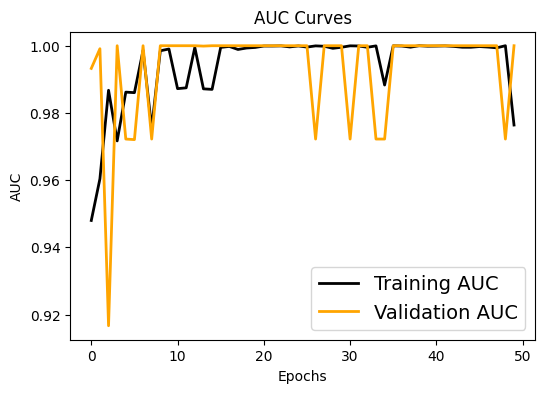

In [ ]:
# AUC curve

plt.figure(figsize=[6, 4])
plt.plot(history.history["auc"], "black", linewidth=2.0)
plt.plot(history.history["val_auc"], "orange", linewidth=2.0)
plt.legend(["Training AUC", "Validation AUC"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("AUC", fontsize=10)
plt.title("AUC Curves", fontsize=12)

In [ ]:
print("Average AUC Score: ", np.mean(history.history["val_auc"]))

Average AUC Score:  0.9937304759025574
